In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the data (both train and test data) into feature matrix, class labels, and event ids:


In [2]:
from proj1_helpers import *

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y, train_input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = '../data/test.csv' 
y_test, test_input_data, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
train_input_data.shape, y.shape

((250000, 30), (250000,))

In [6]:
test_input_data.shape, y_test.shape

((568238, 30), (568238,))

## Preprocess the data

In [7]:
from preprocessing import *

In [8]:
tX = preprocess_data(train_input_data)

In [9]:
tX_test = preprocess_data(test_input_data)

## Do your thing crazy machine learning thing here :) 

In [10]:
from implementations import *
from cross_validation import *
import time

For each model, we will use 4-fold cross-validation to find optimal hyper-parameters. Then we run our model with those parameters and produce the submissions

In [11]:
k_fold = 4

Then we use 5-fold cross-validation to compute variance of accurancy and loss

### Linear Regression Using Gradient Descent

In [12]:
# seed is updated each time it is used for unbiased results
seed = 1

In [13]:
degree_GD = 2
gamma_GD = 1E-2
max_iters_GD = 100

In [14]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_GD)
extended_feature_matrix_test = build_poly(tX_test, degree_GD)

In [15]:
initial_w = np.zeros((extended_feature_matrix_train.shape[1]))

weights_GD, loss_GD = least_squares_GD(y, extended_feature_matrix_train, initial_w, max_iters_GD, gamma_GD)

In [16]:
loss_GD

0.32282209525914896

In [17]:
# train accuracy
accuracy(y, extended_feature_matrix_train, weights_GD)

0.769

In [18]:
# test accuracy
accuracy(y_test, extended_feature_matrix_test, weights_GD)

0.24312699960227932

In [19]:
# cross-validation for accuracy
rmse_tr_GD, rmse_te_GD, acc_GD = error_accuracy_validation(y, tX, k_fold, degree_GD, 'least_squares_GD', 0, max_iters_GD, gamma_GD, seed)

In [20]:
# accuracy mean and std
np.mean(acc_GD), np.std(acc_GD)

(0.7689266666666665, 0.00020763643439648658)

### Linear Regression using SGD

In [21]:
seed = 2

In [22]:
degree_SGD = 2
gamma_SGD = 1E-7
max_iters_SGD = 2000

In [23]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_SGD)
extended_feature_matrix_test = build_poly(tX_test, degree_SGD)

In [24]:
np.random.seed(42)

initial_w = np.zeros((extended_feature_matrix_train.shape[1]))

weights_SGD, loss_SGD = least_squares_SGD(y, extended_feature_matrix_train, initial_w, max_iters_SGD, gamma_SGD)

In [25]:
loss_SGD

0.4992347787408522

In [26]:
# train accuracy
accuracy(y, extended_feature_matrix_train, weights_SGD)

0.68166

In [27]:
# test accuracy
accuracy(y_test, extended_feature_matrix_test, weights_SGD)

0.03530738880539492

In [28]:
# cross-validation for accuracy
rmse_tr_SGD, rmse_te_SGD, acc_SGD = error_accuracy_validation(y, tX, k_fold, degree_SGD, 'least_squares_SGD', 0, max_iters_SGD, gamma_SGD, seed)

In [29]:
# accuracy mean and std
np.mean(acc_SGD), np.std(acc_SGD)

(0.6817586666666667, 0.008883831305617335)

### Least Squares regression

In [30]:
# seed is updated each time it is used for unbiased results
seed = 3

In [31]:
degree_LS = 1

In [32]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_LS)
extended_feature_matrix_test = build_poly(tX_test, degree_LS)

In [33]:
weights_LS, loss_LS = least_squares(y, extended_feature_matrix_train)

In [34]:
# train accuracy
accuracy(y, tX, weights_LS)

0.741136

In [35]:
# test accuracy
accuracy(y_test, tX_test, weights_LS)

0.2529521080955515

In [36]:
# cross-validation for accuracy
rmse_tr_LS, rmse_te_LS, acc_LS = error_accuracy_validation(y, tX, k_fold, 1, 'least_squares', 0, 0, 0, seed)

In [37]:
# accuracy mean and std
np.mean(acc_LS), np.std(acc_LS)

(0.7410906666666667, 0.00018782497763136487)

### Logistic regression using gradient descent

In [38]:
# for unbiased results, seed is updated each time it is used
seed = 4

In [39]:
degree_LOG = 3
max_iters_LOG = 500 
gamma_LOG = 1e-4

In [40]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_LOG)
extended_feature_matrix_test = build_poly(tX_test, degree_LOG)

In [41]:
# We need to transform the categories from {-1,1} to {0,1}
y_01 = change_11_to_01_categories(y)

In [42]:
initial_w = np.zeros((extended_feature_matrix_train.shape[1]))

weights_LOG, loss_LOG = logistic_regression(y_01, extended_feature_matrix_train, initial_w, max_iters_LOG, gamma_LOG)

In [43]:
# train accuracy
accuracy(y, extended_feature_matrix_train, weights_LOG)

0.7709

In [44]:
# test accuracy
accuracy(y_test, extended_feature_matrix_test, weights_LOG)

0.3919924397875538

In [45]:
# cross-validation for accuracy
rmse_tr_LOG, rmse_te_LOG, acc_LOG = error_accuracy_validation(y, tX, k_fold, degree_SGD, 'logistic_regression', 0, max_iters_LOG, gamma_LOG, seed)

In [46]:
# accuracy mean and std
np.mean(acc_LOG), np.std(acc_LOG)

(0.70418, 0.0002676614777413023)

### Regularized logistic regression using gradient descent

In [47]:
seed = 5

In [48]:
degree_RLOG = 3
max_iters_RLOG = 500
lambda_RLOG = 1e-4
gamma_RLOG = 1e-4

In [49]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_RLOG)
extended_feature_matrix_test = build_poly(tX_test, degree_RLOG)

In [50]:
# We need to transform the categories from {-1,1} to {0,1}
y_01 = change_11_to_01_categories(y)

In [51]:
initial_w = np.zeros((extended_feature_matrix_train.shape[1]))

weights_RLOG, loss_RLOG = reg_logistic_regression(y_01, extended_feature_matrix_train, lambda_RLOG, initial_w, max_iters_RLOG, gamma_RLOG)

In [52]:
# train accuracy
accuracy(y, extended_feature_matrix_train, weights_RLOG)

0.766276

In [53]:
# test accuracy
accuracy(y_test, extended_feature_matrix_test, weights_RLOG)

0.2785874932686656

In [54]:
# cross-validation for accuracy
rmse_tr_RLOG, rmse_te_RLOG, acc_RLOG = error_accuracy_validation(y, tX, k_fold, degree_SGD, 'logistic_regression', lambda_RLOG, max_iters_RLOG, gamma_RLOG, seed)

In [55]:
# accuracy mean and std
np.mean(acc_RLOG), np.std(acc_RLOG)

(0.7040893333333333, 0.0007131563643409471)

### Ridge Regression

For this model, we use cross-validation to find the best hyper-parameters

In [56]:
# seed is updated each time it is used, for unbiased results
seed = 6

In [57]:
start_time = time.time()

degrees = np.arange(1,12)
lambdas = np.logspace(-4, -1, 30)
degree_RR, lambda_RR, rmse_RR, best_per_degree = select_best_hyperparams_ridge_regression(y, tX, k_fold, degrees, lambdas, seed)

end_time = time.time()
print(f"The execution time is: {end_time-start_time}")

The execution time is: 1623.5960257053375


In [58]:
degree_RR, lambda_RR, rmse_RR

(9, 0.00041753189365604, 0.7402028046388752)

In [59]:
# build polynomials
extended_feature_matrix_train = build_poly(tX, degree_RR)
extended_feature_matrix_test = build_poly(tX_test, degree_RR)

In [60]:
weights_RR, loss_RR = ridge_regression(y, extended_feature_matrix_train, lambda_RR)

In [61]:
# train accuracy
accuracy(y, extended_feature_matrix_train, weights_RR)

0.818672

In [62]:
# test accuracy
accuracy(y_test, extended_feature_matrix_test, weights_RR)

0.3050183197885393

In [63]:
seed = 5
# cross-validation for accuracy
rmse_tr_RR, rmse_te_RR, acc_RR = error_accuracy_validation(y, tX, k_fold, degree_SGD, 'ridge_regression', lambda_RR, 0, 0, seed)

In [64]:
# accuracy mean and std
np.mean(acc_RR), np.std(acc_RR)

(0.7833720000000001, 0.00022429742159313273)

## Compare RMSE and accuracies

In [65]:
rmse_tr = [rmse_tr_GD, rmse_tr_SGD, rmse_tr_LS, rmse_tr_RR, rmse_tr_LOG, rmse_tr_RLOG]
rmse_te = [rmse_te_GD, rmse_te_SGD, rmse_te_LS, rmse_te_RR, rmse_te_LOG, rmse_te_RLOG]
acc = [acc_GD, acc_SGD, acc_LS, acc_RR, acc_LOG, acc_RLOG]

In [66]:
names = ['GD', 'SGD', 'LS', 'RidReg', 'LogReg', 'RegLogReg']

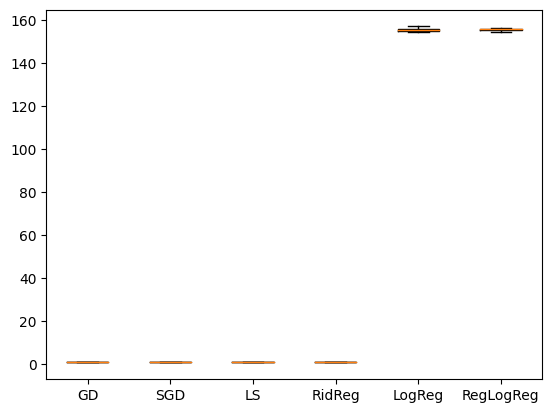

In [67]:
ax = plt.boxplot(rmse_tr, labels=names)

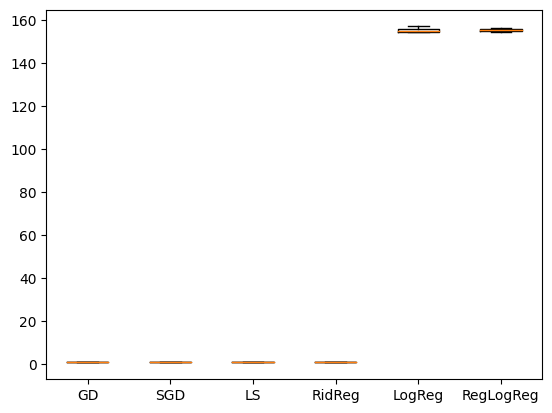

In [68]:
ax = plt.boxplot(rmse_te, labels=names)

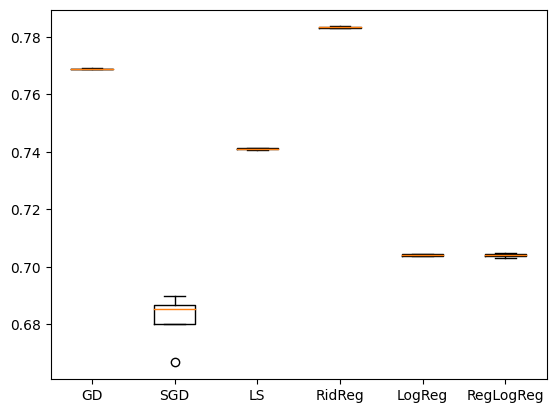

In [69]:
ax = plt.boxplot(acc, labels=names)

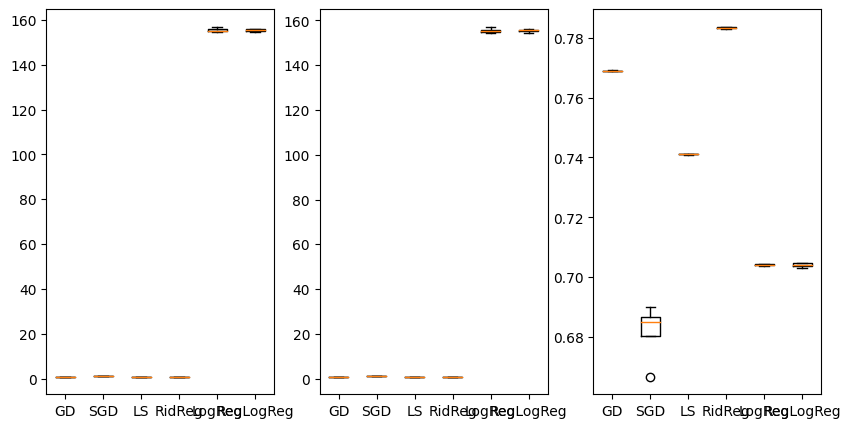

In [70]:
fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(10,5))
ax0 = ax0.boxplot(rmse_tr, labels = names)
ax1 = ax1.boxplot(rmse_te, labels = names)
ax2 = ax2.boxplot(acc, labels = names)

## Generate predictions and save ouput in csv format for submission:

In [71]:
OUTPUT_PATH = '../data/submission.csv'
y_pred = predict_labels(weights_RR, extended_feature_matrix_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'w' is not defined